<a href="https://colab.research.google.com/github/LongNguyen1984/TimeSeriesWithPython/blob/main/waveletExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pywt

In [ ]:
x = [3, 7, 1, 1, -2, 5 ,4 , 6]
db1 = pywt.Wavelet('db1')
a3, d3, d2, d1 = pywt.wavedec(x, db1)


In [ ]:
print(a3)

[8.83883476]


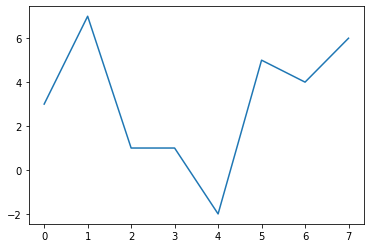

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x)

In [ ]:
print(pywt.waverec([a3, d3, d2, d1], db1))

[ 3.  7.  1.  1. -2.  5.  4.  6.]


In [ ]:
coeffs = pywt.swt(x, db1,level=3)
coeffs

[(array([8.83883476, 8.83883476, 8.83883476, 8.83883476, 8.83883476,
         8.83883476, 8.83883476, 8.83883476]),
  array([-0.35355339, -3.8890873 , -5.30330086, -3.18198052,  0.35355339,
          3.8890873 ,  5.30330086,  3.18198052])),
 (array([ 6. ,  3.5,  2.5,  4. ,  6.5,  9. , 10. ,  8.5]),
  array([ 4.0000000e+00,  4.5000000e+00, -5.0000000e-01, -5.0000000e+00,
         -3.5000000e+00, -8.8817842e-16,  0.0000000e+00,  5.0000000e-01])),
 (array([ 7.07106781,  5.65685425,  1.41421356, -0.70710678,  2.12132034,
          6.36396103,  7.07106781,  6.36396103]),
  array([-2.82842712,  4.24264069,  0.        ,  2.12132034, -4.94974747,
          0.70710678, -1.41421356,  2.12132034]))]

In [ ]:
print(pywt.waverec(coeffs, db1))

In [ ]:
(A3, D3), (A2, D2), (A1, D1) = pywt.swt(x, db1, level=3)

In [ ]:
a3

array([8.83883476])

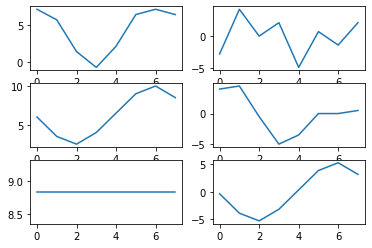

In [ ]:
plt.subplot(321)
plt.plot(A1)
plt.subplot(322)
plt.plot(D1)
plt.subplot(323)
plt.plot(A2)
plt.subplot(324)
plt.plot(D2)

plt.subplot(325)
plt.plot(A3)
plt.subplot(326)
plt.plot(D3)


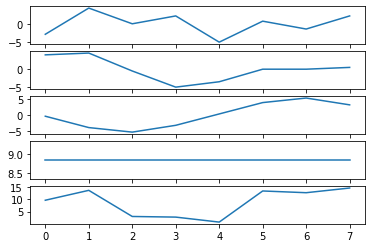

In [ ]:
plt.subplot(511)
plt.plot(D1)
plt.subplot(512)
plt.plot(D2)
plt.subplot(513)
plt.plot(D3)
plt.subplot(514)
plt.plot(A3)
plt.subplot(515)
plt.plot(A3 + D3 + D2 + D1 )



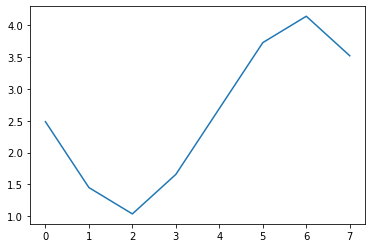

In [ ]:
plt.plot(A3 + D3 - A2)

### Read data

In [ ]:
import pandas as pd

ppg = pd.read_csv('longcun02.csv', header=0)

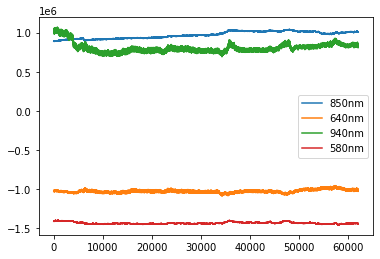

In [ ]:
ppg.plot()

In [360]:
from sklearn.preprocessing import minmax_scale
#Wavelet Decompsition
# take the number data in even length
#data  = minmax_scale(ppg['940nm'][0:np.size(ppg['940nm'])//2*2])
# function calculate length of data in power of 2 and larger > 1023 point
M = np.size(ppg['940nm'])
n = np.floor(np.log2(M))
N = int(2**n)
res = M - N
while res > 1023:
  n = np.floor(np.log2(res))
  N = N + int(2**n)
  res = M - N

data  = ppg['940nm'][0:N] - np.mean(ppg['940nm'][0:N])
data  = minmax_scale(ppg['940nm'][0:N])
#data  = ppg['940nm'][0:N]
WDS = pywt.swt(data, 'db10', level=7)

In [ ]:
np.size(ppg['940nm'])

62111

In [ ]:
WDS[6][1]

array([ 0.0068069 ,  0.01625053,  0.00408945, ...,  0.19685915,
       -0.05775381, -0.07228792])

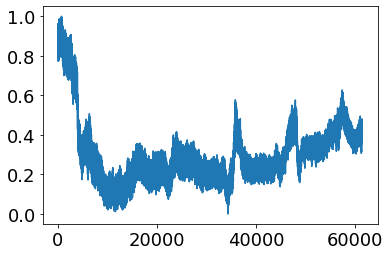

In [344]:
plt.plot(data)

In [ ]:

np.log2(np.size(ppg['940nm']))- np.floor(np.log2(np.size(ppg['940nm'])))

0.922561175210852

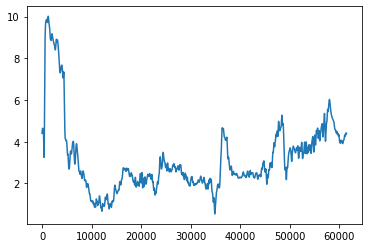

In [ ]:
plt.plot(WDS[0][0][1000:1700])

##Plot with single command

[]

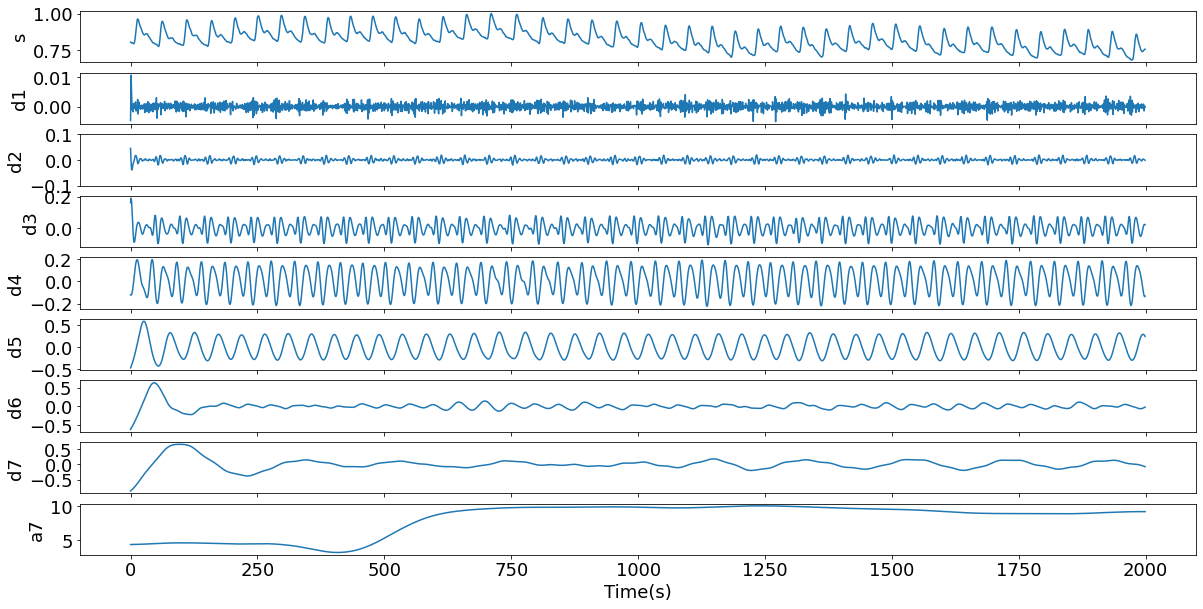

In [ ]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})
# length of window observation
L1, L2 = 0, 2000
plt.subplot(9, 1, 9)
plt.plot(WDS[0][0][L1:L2])
plt.xlabel('Time(s)')
plt.ylabel('a7')
#frame1 = plt.gca()
#frame1.axes.xaxis.set_ticklabels([])

plt.subplot(9, 1, 8)
plt.plot(WDS[0][1][L1:L2])
#plt.xlabel('Time(s)')
plt.ylabel('d7')
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])

plt.subplot(9, 1, 7)
plt.plot(WDS[1][1][L1:L2])
#plt.xlabel('Time(s)')
plt.ylabel('d6')
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])

plt.subplot(9, 1, 6)
plt.plot(WDS[2][1][L1:L2])
#plt.xlabel('Time(s)')
plt.ylabel('d5')
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])

plt.subplot(9, 1, 5)
plt.plot(WDS[3][1][L1:L2])
#plt.xlabel('Time(s)')
plt.ylabel('d4')
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])

plt.subplot(9, 1, 4)
plt.plot(WDS[4][1][L1:L2])
#plt.xlabel('Time(s)')
plt.ylabel('d3')
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])

plt.subplot(9, 1, 3)
plt.plot(WDS[5][1][L1:L2])
#plt.xlabel('Time(s)')
plt.ylabel('d2')
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])
plt.ylim([-0.1,0.1])

plt.subplot(9, 1, 2)
plt.plot(WDS[6][1][L1:L2])
#plt.xlabel('Time(s)')
plt.ylabel('d1')
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])

plt.subplot(9, 1, 1)
plt.plot(data[L1:L2])
#plt.xlabel('Time(s)')
plt.ylabel('s')
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])

### Plot with for command

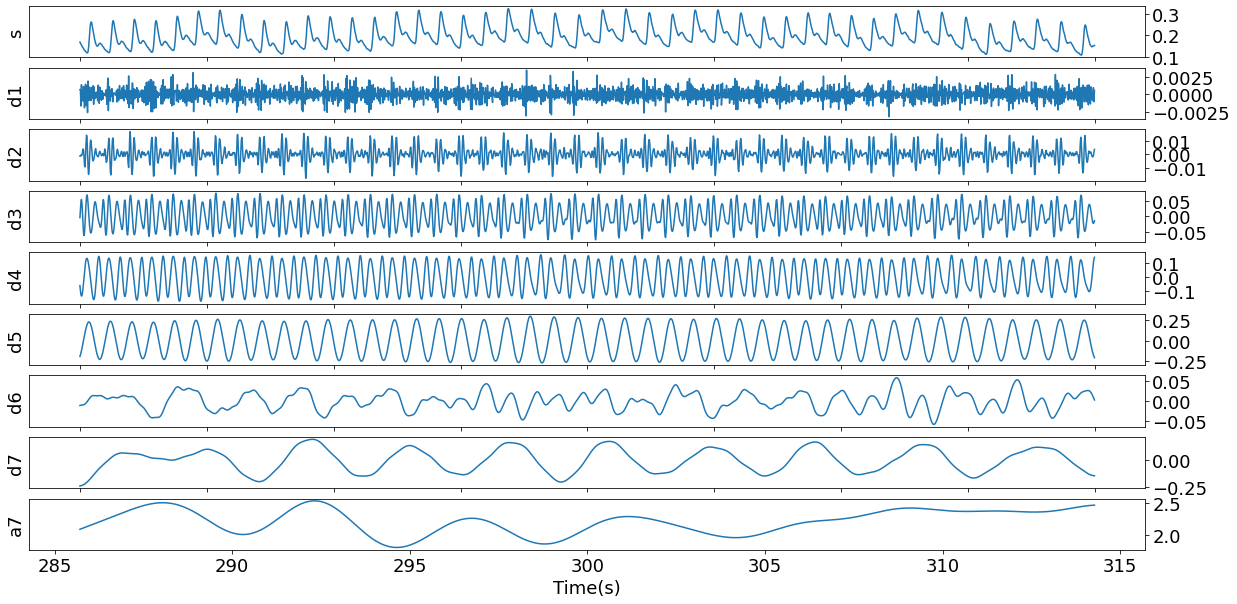

In [361]:
fig,axs = plt.subplots(9,1,figsize=(20,10))
#fig.subplots_adjust(hspace=0.2, wspace=0.0)
#plt.rcParams['axes.titlepad'] = 20 
L1, L2 = 20000, 22000
# range of x after convert to sampling rate at 70
x = [i/70 for i in range(L1,L2)]


n = [i for i in range(0,9)]
labels = ['s','d1','d2','d3','d4','d5','d6','d7', 'a7']
for ax,i in zip(axs,n):
  

  if i==8:
     ax.plot(x, WDS[0][0][L1:L2])
     ax.set_xlabel('Time(s)') 
     #ax.xaxis.set_ticklabels(xlabel)
  elif i==0:
    ax.plot(data[L1:L2])
    #ax.xaxis.set_ticklabels([])
  else:
    ax.plot(WDS[7-i][1][L1:L2])
    #ax.xaxis.set_ticklabels([]) # hidden xtick
    #ax.set_ylim([-0.1,0.1])
  ax.set_ylabel(labels[i])
  ax.yaxis.tick_right()
  ax.yaxis.Exponent = 5
  #ax.yaxis.set_label_position("right")
  ax.label_outer() # hidden xtick
  
  #ax.title.set_position([5.5, 1.05])  

#fig.subplots_adjust(left=0.20)

### Combine wave band

In [368]:
s=[]
s.append(data)
s.append(WDS[6][1]+ WDS[5][1]) ## s0 = d1 + d2
s.append(WDS[4][1]+ WDS[3][1]) ## s1 = d3 + d4
s.append(WDS[2][1]+ WDS[1][1] + WDS[0][1]) ## s2 = d5 + d6 + d7
#s.append(WDS[2][1]+ WDS[1][1] ) ## s2 = d5 + d6 + d7
s.append(WDS[0][0]) # a7

In [366]:
s=[]
s.append(data)
s.append(WDS[6][1]) ## s0 = d1 + d2
s.append(WDS[5][1]+ WDS[4][1]) ## s1 = d3 + d4
s.append(WDS[3][1]+ WDS[2][1] + WDS[1][1] ) ## s2 = d5 + d6 + d7
#s.append(WDS[3][1]+ WDS[2][1] ) ## s2 = d5 + d6 + d7
s.append(WDS[0][0]) # a7

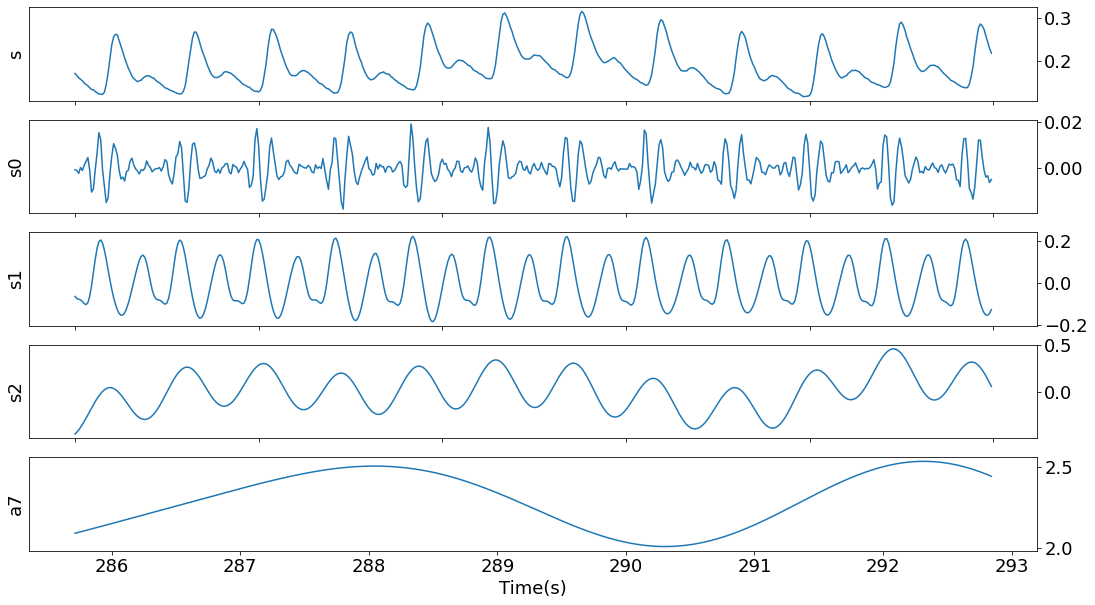

In [369]:
fig,axs = plt.subplots(5,1,figsize=(20,10))
L1 , L2 = 20000, 20500
# range of x after convert to sampling rate at 70
x = [i/70 for i in range(L1,L2)]


n = [i for i in range(0,5)]
labels = ['s','s0','s1','s2','a7']
for ax,i in zip(axs,n):
  

  if i==4:
     ax.plot(x, WDS[0][0][L1:L2])
     ax.set_xlabel('Time(s)') 
     #ax.xaxis.set_ticklabels(xlabel)
  else:
    ax.plot(s[i][L1:L2])
    #ax.xaxis.set_ticklabels([]) # hidden xtick
    #ax.set_ylim([-0.1,0.1])
  ax.set_ylabel(labels[i])
  ax.yaxis.tick_right()
  ax.yaxis.Exponent = 5
  #ax.yaxis.set_label_position("right")
  ax.label_outer() # hidden xtick
  
  #ax.title.set_position([5.5, 1.05])  

fig.subplots_adjust(left=0.20)

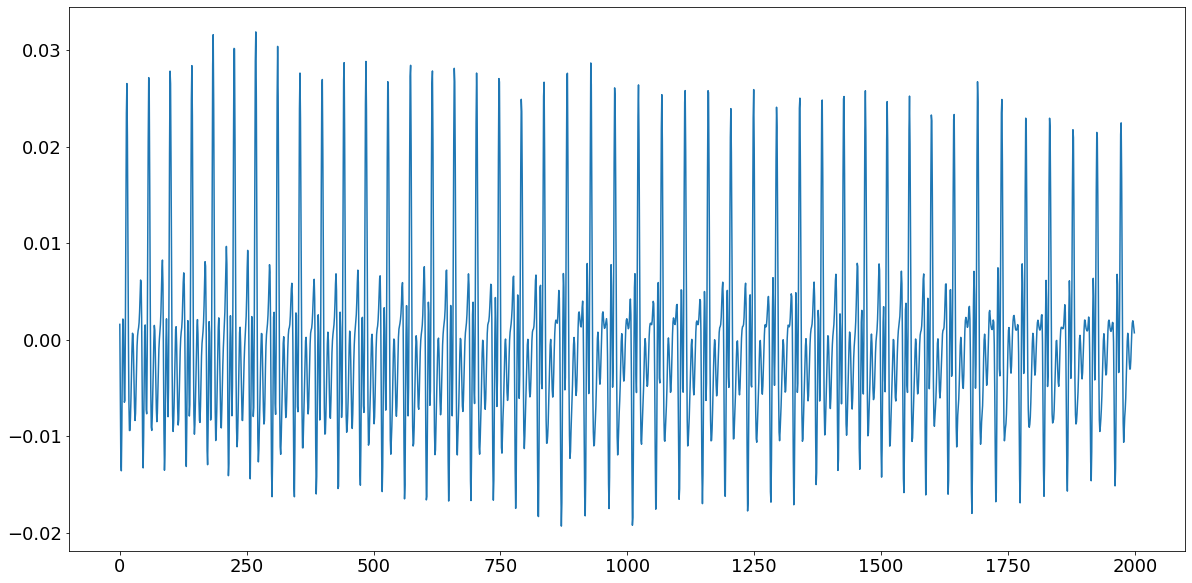

In [364]:

p = [s1*s2 for s1, s2 in zip(s[2],s[3])]
np.size(p)
plt.subplots(figsize=(20,10))
plt.plot(p[L1:L2])